## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as
“Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.<br>

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.<br>

The Dystopia Residual is already provided in the dataset.<br>

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.<br>

You need to predict the happiness score considering all the other factors mentioned in the dataset.

## Dataset Link

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


There are 10 numerical variables and 2 categorical variables

### Exploratory Data Analysis

In [3]:
# Getting dimensions od the dataset
df.shape

(158, 12)

The dataset contains 158 rows and 12 columns. There is one otput or target variable (Happiness Score). Rest are all input variables. 'Rank' is based on 'Happiness Score'.

In [4]:
# Getting the column names
df.columns.to_list()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

The independent variables are:
'Country', 'Region','Happiness Rank', 'Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'<br>

The target variable is:
'Happiness Score'

In [5]:
# Checking datatype of each column
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

The datatypes present in the dataset are object, int64 and float64 as expected.

In [6]:
# Checking for null values
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no NaN or na values in the dataset, which means that there are no missing values.

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates present in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
# Number of unique values for each variable
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [10]:
num_cols = df.drop(['Country', 'Region'], axis=1)

From this we can see that except 'Region' all the other columns have almost all unique values.

#### Dataset description

In [11]:
# Statistical summary of numerical columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations from the above description:<br>
- There are no missing values in any of the columns as the count is same for all.
- The mean is slightly greater the median for 'Happiness Score', 'Standard Error', 'Trust (Government Corruption)' and 'Generosity' column. This means the data in these columns is skewed to the right.
- The mean is less than the median for 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'	and 'Freedom'. Data in these columns are skewed to the left.

#### Data Visualisation

In [12]:
sns.set_palette(sns.color_palette("Set2"))

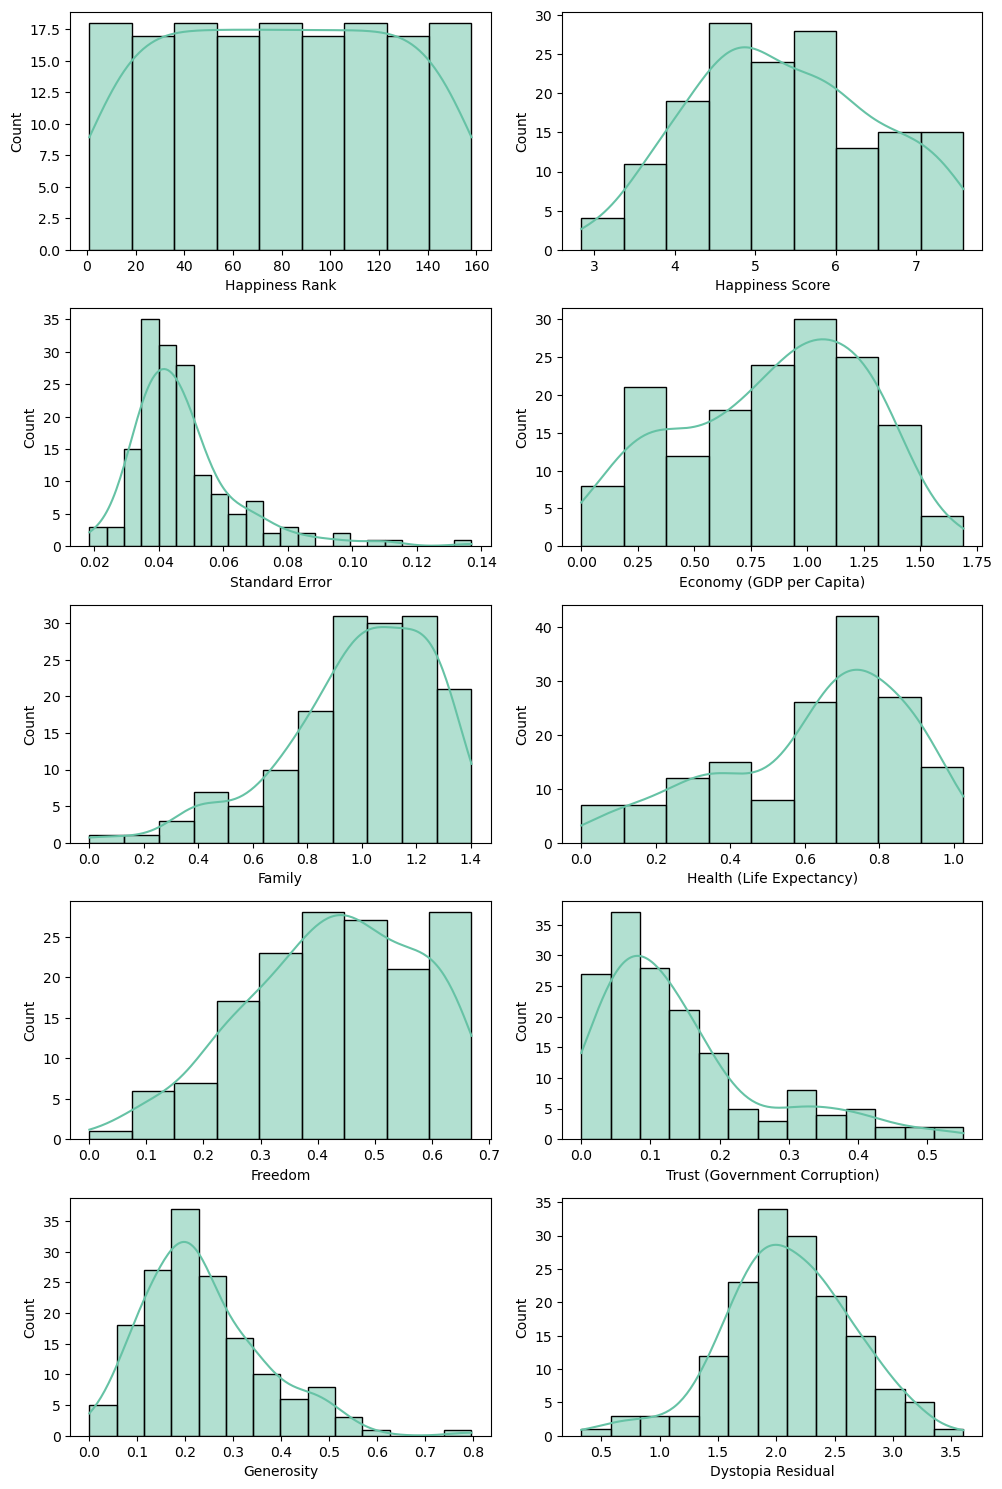

In [13]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 15))
plot_num = 1
for col in num_cols:
    if plot_num <= 10:
        ax = plt.subplot(5, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

As observed from statistical description of the dataset, 'Standard Error', 'Trust (Government Corruption)' and 'Generosity' are skewed to the right, while 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'	and 'Freedom' are skewed to the left.

In [14]:
# Mean Happiness Score for each region
mean_happiness_region= df[['Region', 'Happiness Score']].groupby('Region', as_index = False).mean()
mean_happiness_region

,Region,Happiness Score
0,Australia and New Zealand,7.285000
1,Central and Eastern Europe,5.332931
2,Eastern Asia,5.626167
3,Latin America and Caribbean,6.144682
4,Middle East and Northern Africa,5.406900
5,North America,7.273000
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800
9,Western Europe,6.689619


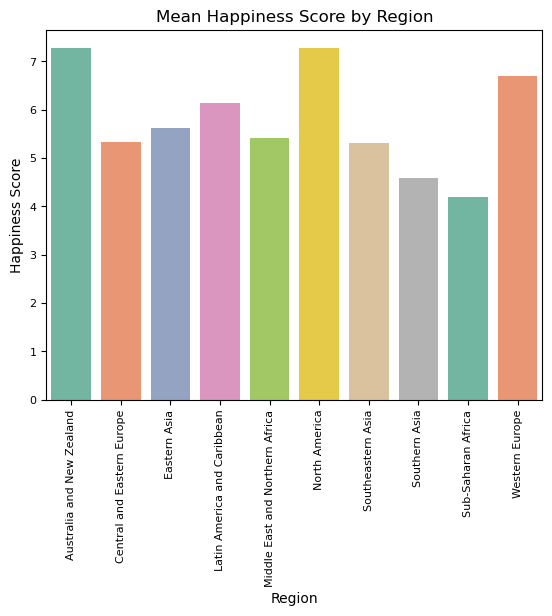

In [15]:
# Visualising the mean Happiness Score by Region
sns.barplot(x=mean_happiness_region['Region'], y=mean_happiness_region['Happiness Score'], palette='Set2')
plt.title('Mean Happiness Score by Region')
plt.ylabel('Happiness Score', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Australia and New Zealand has the highest mean Happiness Score, followed by North America and Western Europe.<br>
Sub-Saharan Africa, Southern Asia and Southeastern Asia have the lowest mean Happiness Score.

In [16]:
# Mean Economy (GDP per Capita) for each region
mean_economy_region= df[['Region', 'Economy (GDP per Capita)']].groupby('Region', as_index = False).mean()
mean_economy_region

,Region,Economy (GDP per Capita)
0,Australia and New Zealand,1.291880
1,Central and Eastern Europe,0.942438
2,Eastern Asia,1.151780
3,Latin America and Caribbean,0.876815
4,Middle East and Northern Africa,1.066974
5,North America,1.360400
6,Southeastern Asia,0.789054
7,Southern Asia,0.560486
8,Sub-Saharan Africa,0.380473
9,Western Europe,1.298596


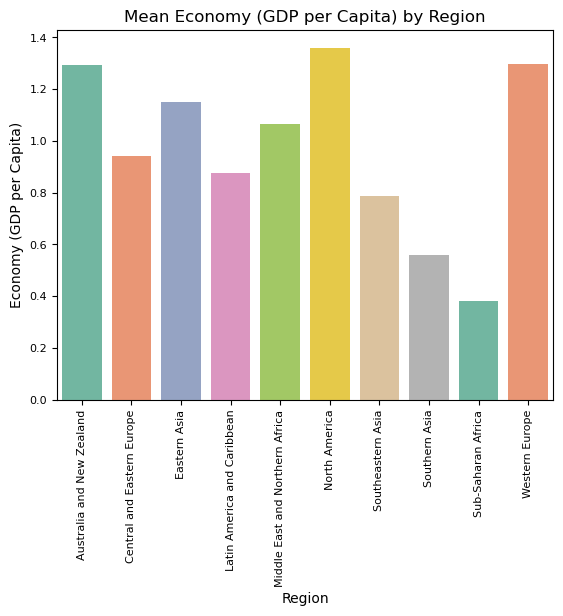

In [17]:
# Visualising the mean Economy (GDP per Capita) by Region
sns.barplot(x=mean_economy_region['Region'], y=mean_economy_region['Economy (GDP per Capita)'], palette='Set2')
plt.title('Mean Economy (GDP per Capita) by Region')
plt.ylabel('Economy (GDP per Capita)', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

North America, Western Europe, and Australia and New Zealand have the highest GDP per Capita.<br>
Sub-Saharan Africa has a very low GDP per Capita value. Southern Asia and Southeastern Asia also have a low GDP per Capita.

In [18]:
# Mean Family values for each region
mean_family_region= df[['Region', 'Family']].groupby('Region', as_index = False).mean()
mean_family_region

,Region,Family
0,Australia and New Zealand,1.314450
1,Central and Eastern Europe,1.053042
2,Eastern Asia,1.099427
3,Latin America and Caribbean,1.104720
4,Middle East and Northern Africa,0.920490
5,North America,1.284860
6,Southeastern Asia,0.940468
7,Southern Asia,0.645321
8,Sub-Saharan Africa,0.809085
9,Western Europe,1.247302


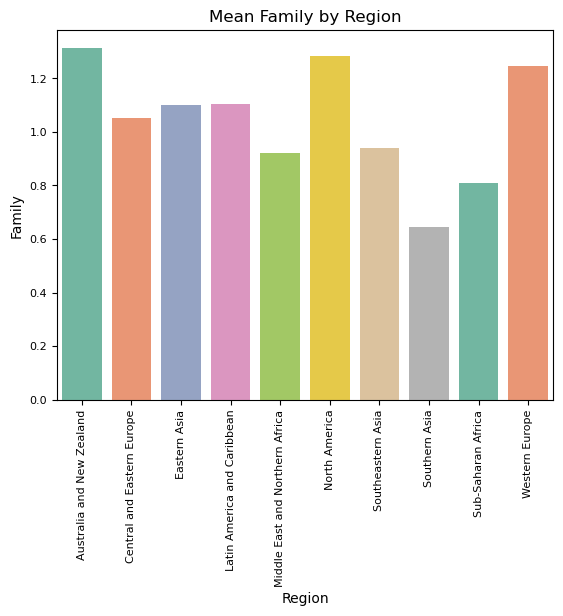

In [19]:
# Visualising the mean Family by Region
sns.barplot(x=mean_family_region['Region'], y=mean_family_region['Family'], palette='Set2')
plt.title('Mean Family by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The highest mean Family values are for Australia and New Zealand, North America and Western Europe.<br>
The lowest, on the other hand, are for Southern Asia, Sub-Saharan Africa and Middle East and Northern Africa.

In [20]:
# Mean Health (Life Expectancy) value for each region
mean_health_region= df[['Region', 'Health (Life Expectancy)']].groupby('Region', as_index = False).mean()
mean_health_region

,Region,Health (Life Expectancy)
0,Australia and New Zealand,0.919965
1,Central and Eastern Europe,0.718774
2,Eastern Asia,0.877388
3,Latin America and Caribbean,0.703870
4,Middle East and Northern Africa,0.705615
5,North America,0.883710
6,Southeastern Asia,0.677357
7,Southern Asia,0.540830
8,Sub-Saharan Africa,0.282332
9,Western Europe,0.909148


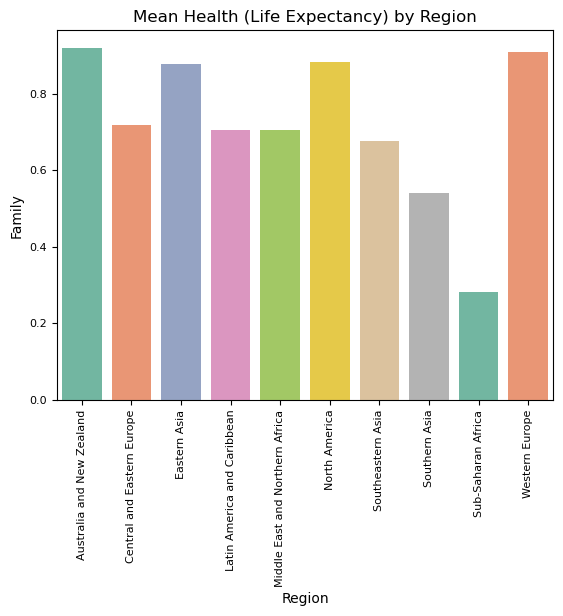

In [21]:
# Visualising the mean Health (Life Expectancy) by Region
sns.barplot(x=mean_health_region['Region'], y=mean_health_region['Health (Life Expectancy)'], palette='Set2')
plt.title('Mean Health (Life Expectancy) by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Australia and New Zealand, Western Europe, North America and Eastern Asia have high Mean Health (Life Expectancy) values.<br>
Sub-Saharan Africa has the lowest Mean Health (Life Expectancy) among all regions.

In [22]:
# Mean Freedom value for each region
mean_freedom_region= df[['Region', 'Freedom']].groupby('Region', as_index = False).mean()
mean_freedom_region

,Region,Freedom
0,Australia and New Zealand,0.645310
1,Central and Eastern Europe,0.358269
2,Eastern Asia,0.462490
3,Latin America and Caribbean,0.501740
4,Middle East and Northern Africa,0.361751
5,North America,0.589505
6,Southeastern Asia,0.557104
7,Southern Asia,0.373337
8,Sub-Saharan Africa,0.365944
9,Western Europe,0.549926


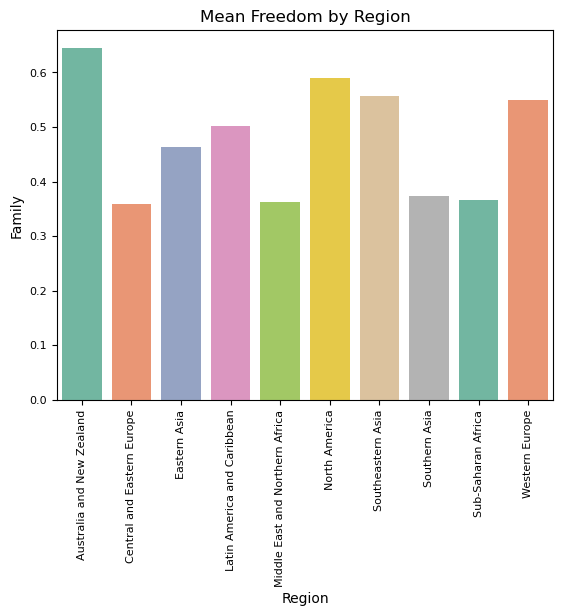

In [23]:
# Visualising the mean Freedom by Region
sns.barplot(x=mean_freedom_region['Region'], y=mean_freedom_region['Freedom'], palette='Set2')
plt.title('Mean Freedom by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Australia and New Zealand, North America, Southeastern Asia and Western Europe have the highest Freedom values.<br>
Central and Eastern Europe, Middle East and Northern Africa, Sub-Saharan Africa and Southern Asia have the lowest Freedom.

In [24]:
# Mean Trust (Government Corruption) value for each region
mean_trust_region= df[['Region', 'Trust (Government Corruption)']].groupby('Region', as_index = False).mean()
mean_trust_region

,Region,Trust (Government Corruption)
0,Australia and New Zealand,0.392795
1,Central and Eastern Europe,0.086674
2,Eastern Asia,0.127695
3,Latin America and Caribbean,0.117172
4,Middle East and Northern Africa,0.181702
5,North America,0.244235
6,Southeastern Asia,0.151276
7,Southern Asia,0.102536
8,Sub-Saharan Africa,0.123878
9,Western Europe,0.231463


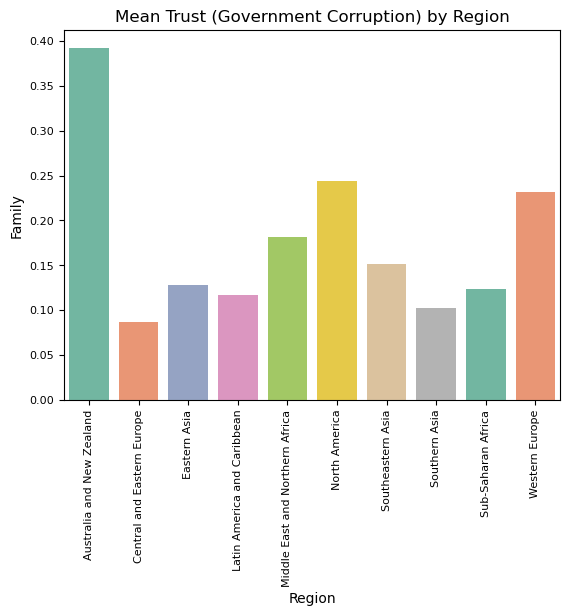

In [25]:
# Visualising the mean Trust (Government Corruption) by Region
sns.barplot(x=mean_trust_region['Region'], y=mean_trust_region['Trust (Government Corruption)'], palette='Set2')
plt.title('Mean Trust (Government Corruption) by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Australia and New Zealand region has the highest Mean Trust (Government Corruption) value, followed by North Amerca and Western Europe.<br>
Central and Eastern Europe, Southern Asia and Sub-Saharan Africa have the lowest Mean Trust (Government Corruption) value.

In [26]:
# Mean Generosity value for each region
mean_generosity_region= df[['Region', 'Generosity']].groupby('Region', as_index = False).mean()
mean_generosity_region

,Region,Generosity
0,Australia and New Zealand,0.455315
1,Central and Eastern Europe,0.152264
2,Eastern Asia,0.225885
3,Latin America and Caribbean,0.217788
4,Middle East and Northern Africa,0.190376
5,North America,0.429580
6,Southeastern Asia,0.419261
7,Southern Asia,0.341429
8,Sub-Saharan Africa,0.221137
9,Western Europe,0.302109


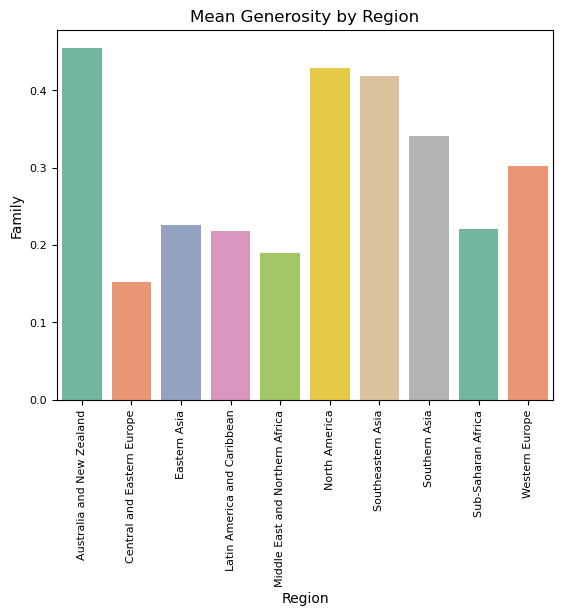

In [27]:
# Visualising the mean Generosity by Region
sns.barplot(x=mean_generosity_region['Region'], y=mean_generosity_region['Generosity'], palette='Set2')
plt.title('Mean Generosity by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Australia and New Zealand, North America, Southeastern Asia and Southern Asia have the highest Mean Generosity values.<br>
Central and Eastern Europe, Middle East and Northern Africa, and Latin America and Caribbean.

In [28]:
# Mean Dystopia Residual value for each region
mean_residual_region= df[['Region', 'Dystopia Residual']].groupby('Region', as_index = False).mean()
mean_residual_region

,Region,Dystopia Residual
0,Australia and New Zealand,2.265355
1,Central and Eastern Europe,2.021400
2,Eastern Asia,1.681607
3,Latin America and Caribbean,2.622577
4,Middle East and Northern Africa,1.980008
5,North America,2.480935
6,Southeastern Asia,1.783020
7,Southern Asia,2.016769
8,Sub-Saharan Africa,2.019980
9,Western Europe,2.151185


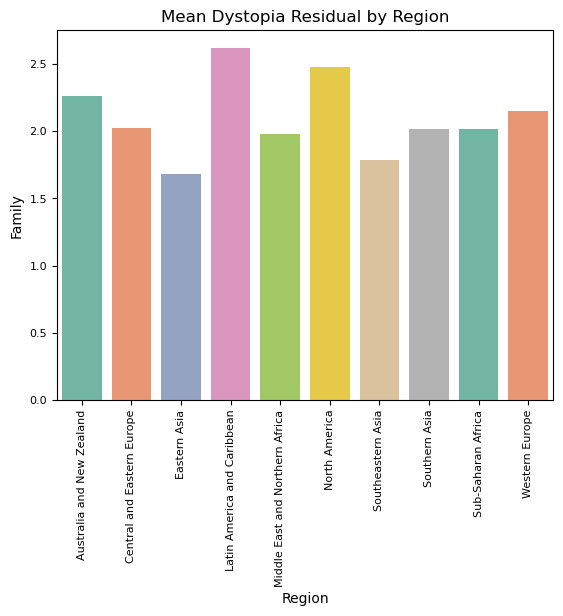

In [29]:
# Visualising the mean Generosity by Region
sns.barplot(x=mean_residual_region['Region'], y=mean_residual_region['Dystopia Residual'], palette='Set2')
plt.title('Mean Dystopia Residual by Region')
plt.ylabel('Family', fontsize = 10)
plt.xlabel('Region', fontsize = 10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Latin America and Caribbean has the highest Mean Dystopis Residual value, while Eastern Asia has the lowest.

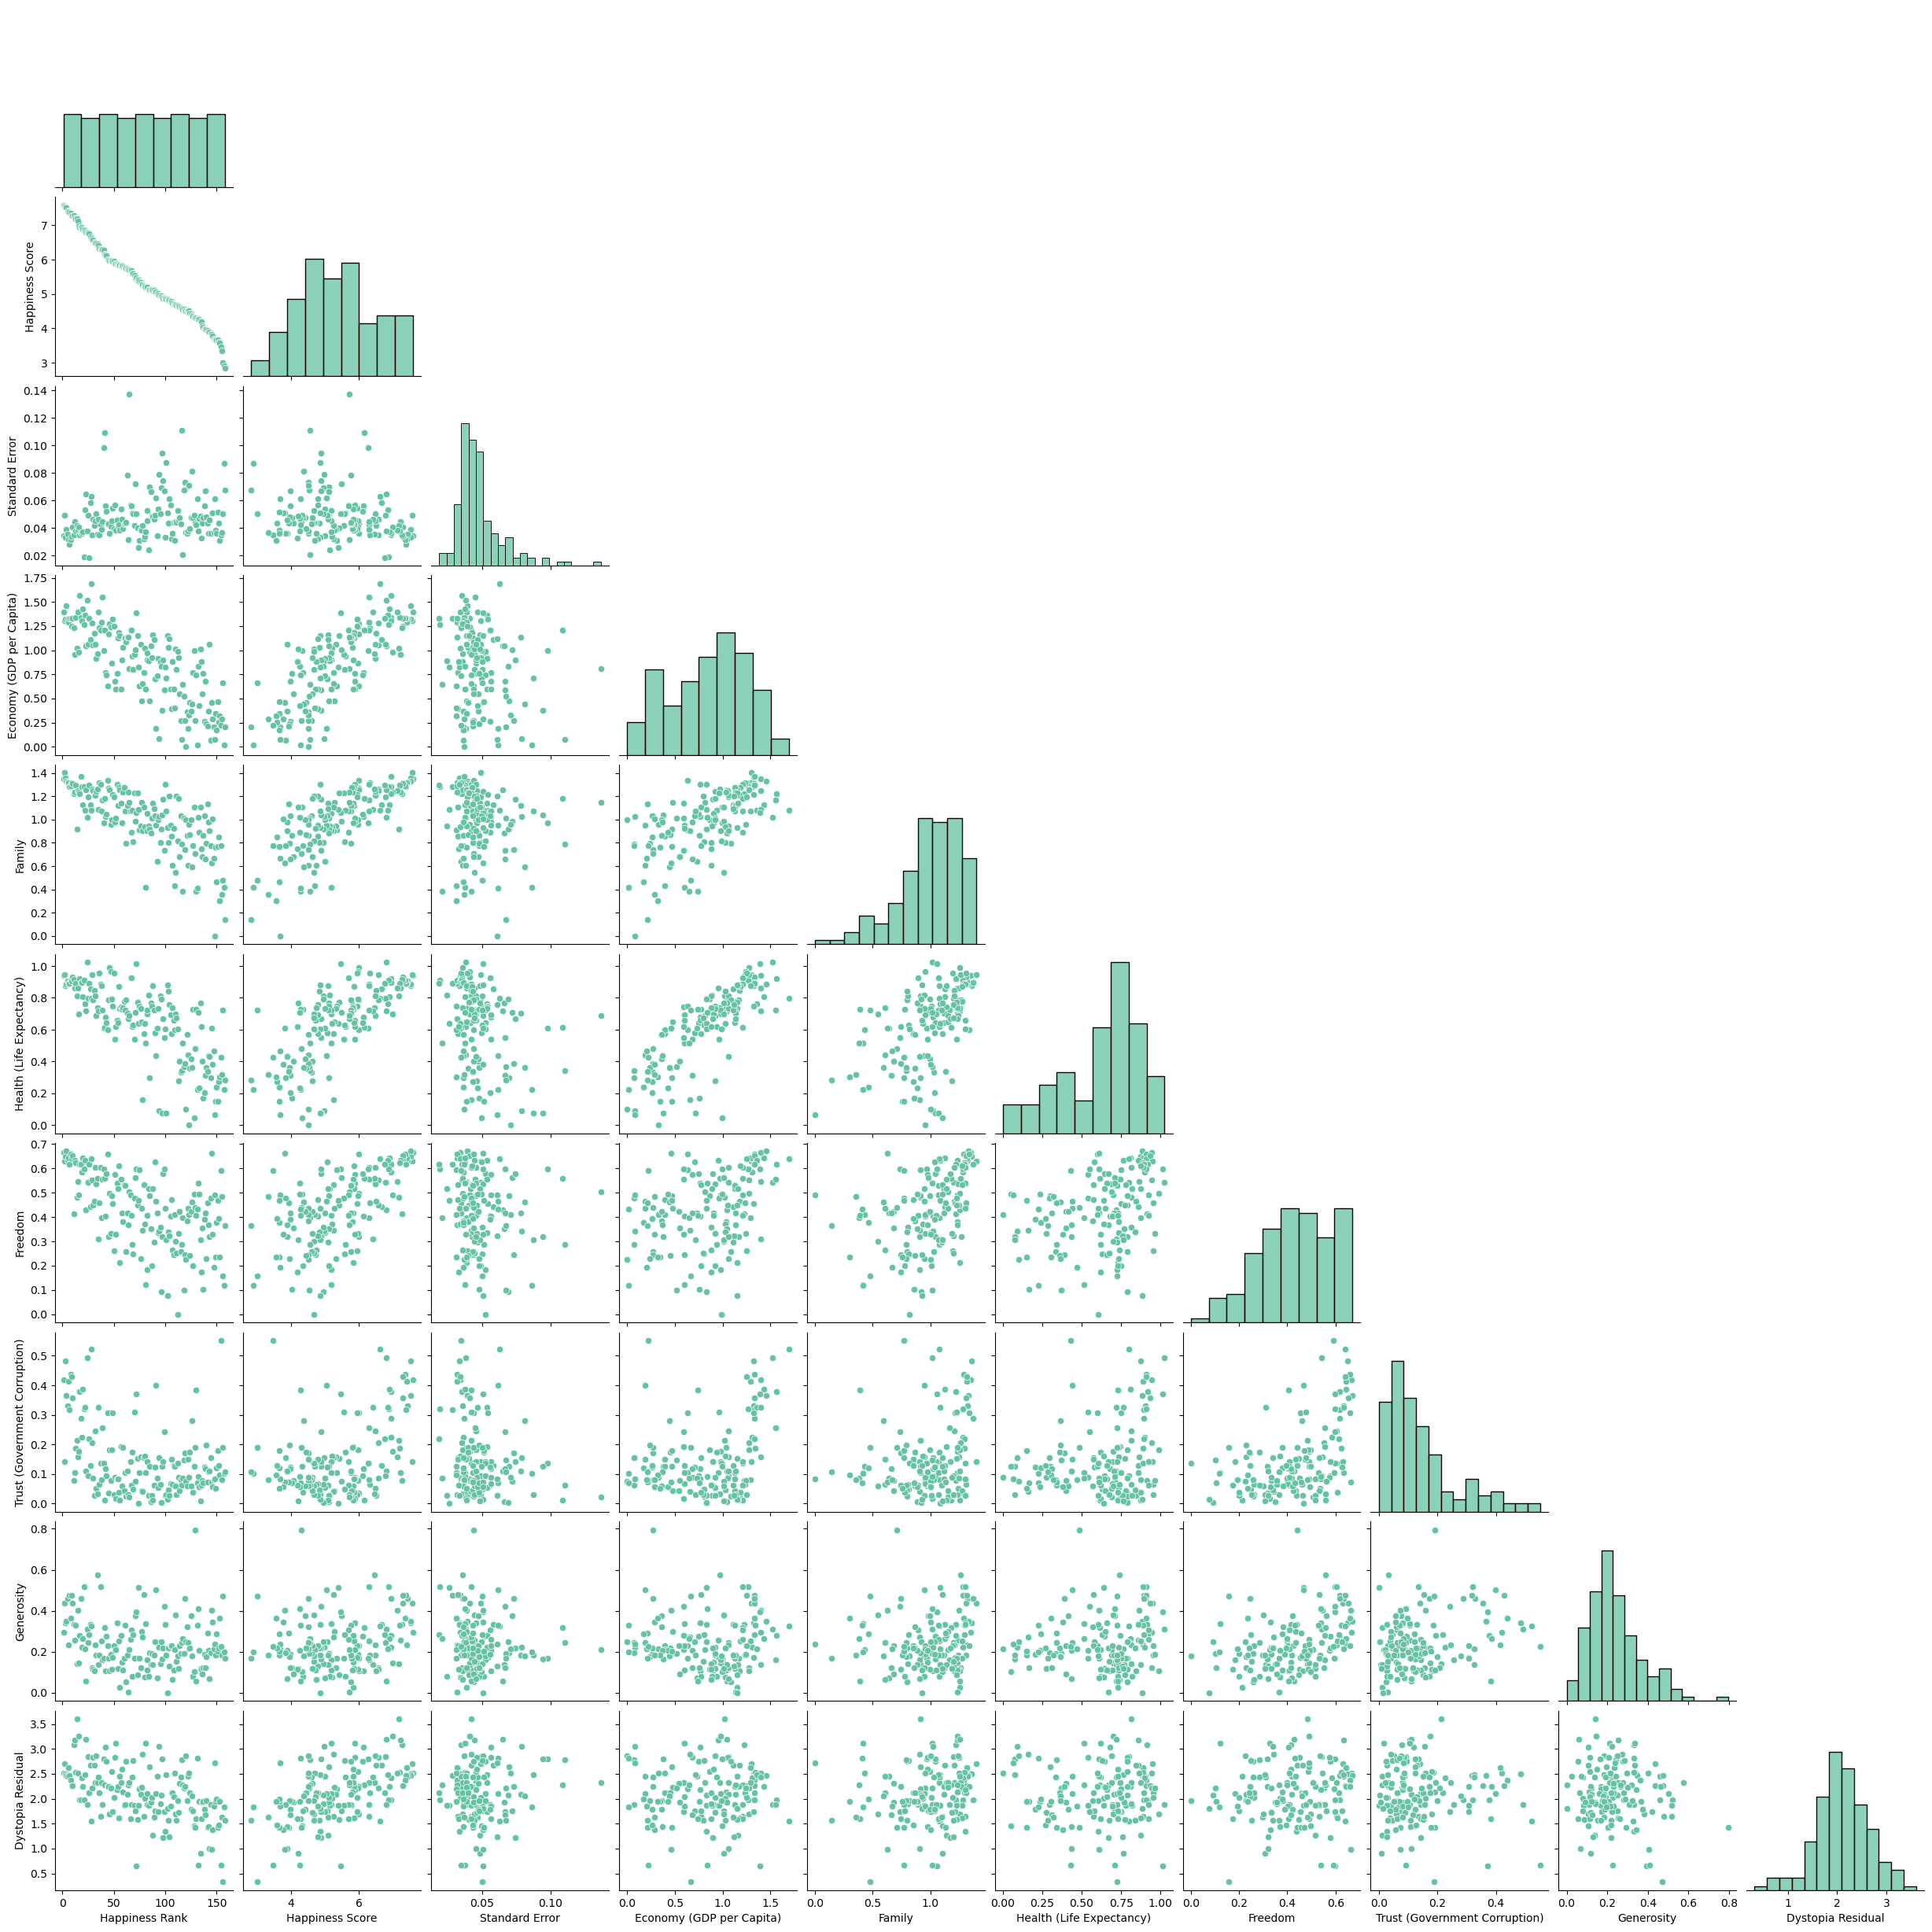

In [30]:
sns.pairplot(data=df, corner = True)
plt.show()

Observations from the pairplot:
- Happiness Rank and Happiness Score have a very high negative correlation. Higher Happiness Score results in a lower Happiness Rank, which is the expected relationship.
- Happiness Score is positively correlated with Economy (GDP per Capita), Family, Health (Life Expectancy) and Freedom. These factors contribute to higher Happiness Score.

### Checking for outliers

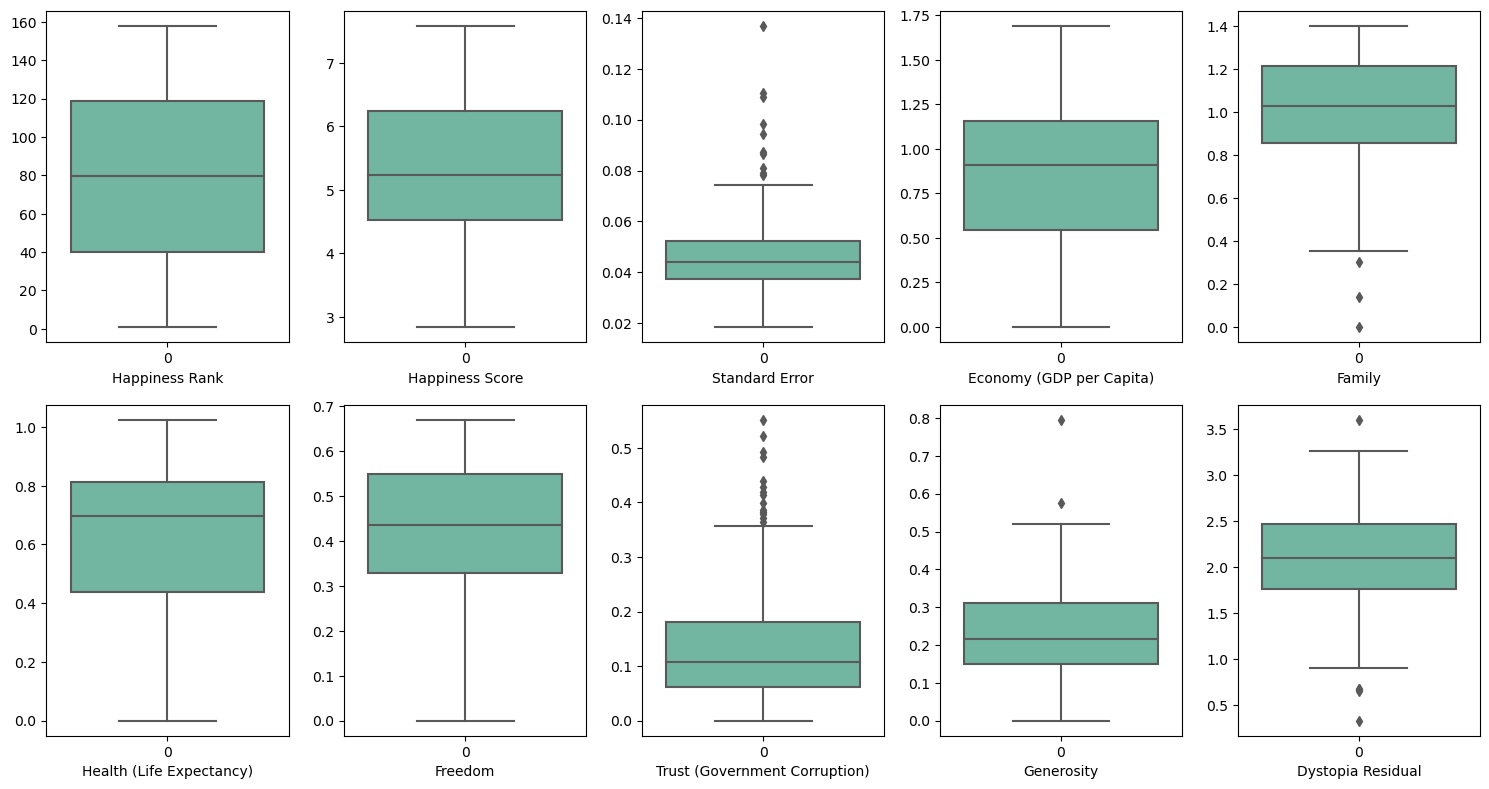

In [31]:
# Checking for outliers using boxplot
plt.figure(figsize=(15, 8))
plot_num = 1
for col in num_cols:
    if plot_num <= 10:
        ax = plt.subplot(2, 5, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The boxplots show that there are outliers in 'Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity' and 'Dystopia Residual' columns. Since, all these values are still plausible, and we have very less data to begin with, we are not removing the outliers.

### Checking for skewness

In [32]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is positive skewness in:<br>
- Standard Error
- Trust (Government Corruption)
- Generosity<br>

There is negative skewness in: <br>
- Family
- Health (Life Expectancy)<br>

The rest of the skewness values are in acceptable range.

In [33]:
# Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [34]:
# Removing skewness
columns = ['Standard Error', 'Trust (Government Corruption)', 'Generosity', 'Family', 'Health (Life Expectancy)']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [35]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,Standard Error,Trust (Government Corruption),Generosity,Family,Health (Life Expectancy)
Log Transformation,0.480010,NaN,NaN,NaN,NaN
Box-Cox Transformation,1.886218,1.199537,0.693521,-1.416565,-0.932505
Inverse Transformation,1.156652,NaN,NaN,NaN,NaN
Yeo Johnson Transformation,-0.019900,0.184195,0.013193,-0.168037,-0.181438
Cube Root Transformation,0.970422,0.011818,-0.951931,-3.539045,-1.962433


From the above analysis, it is evident that Yeo Johnson Transformation was able to reduce the skewness within acceptable range, for all the variables. So we should use the Yeo Johnson Transformation to normalise our data.

In [36]:
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [37]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

Now, all the skewness values are in acceptable range.

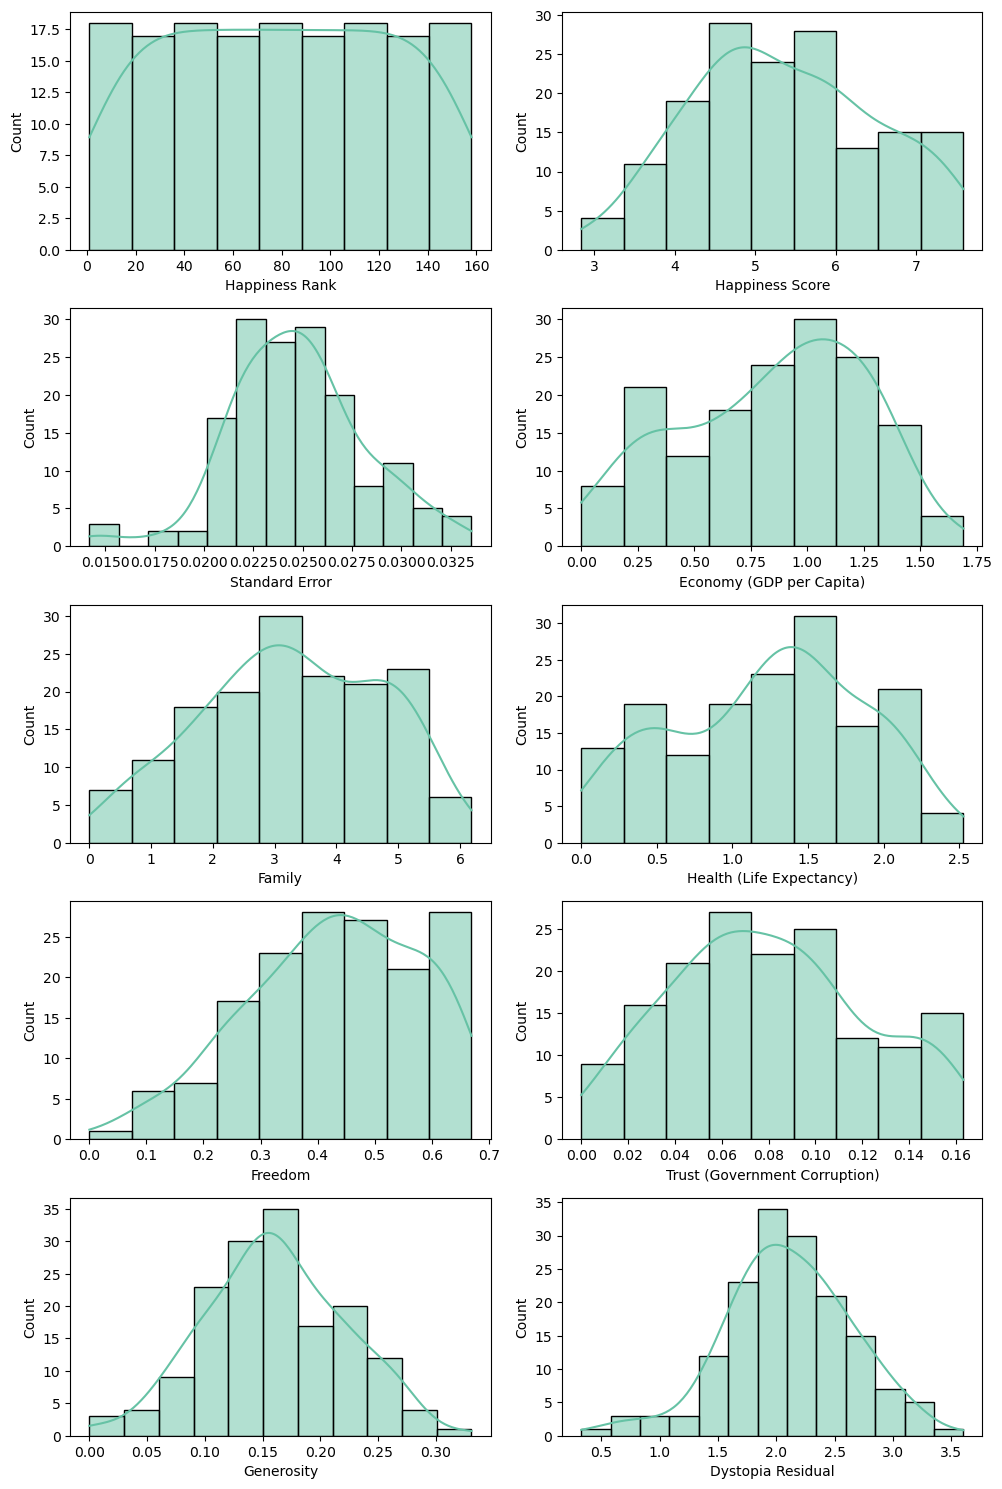

In [38]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 15))
plot_num = 1
for col in num_cols:
    if plot_num <= 10:
        ax = plt.subplot(5, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distributions observed now show that the skewness has been reduced.

### Encoding Categorical variables

In [39]:
# Using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [40]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

In [41]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.021419,1.39651,5.691972,2.179346,0.66557,0.153413,0.198464,2.51738
1,58.0,9.0,2,7.561,0.025790,1.30232,6.186694,2.204887,0.62877,0.093425,0.250490,2.70201
2,37.0,9.0,3,7.527,0.021113,1.32548,5.793505,1.923489,0.64938,0.158877,0.216981,2.49204
3,105.0,9.0,4,7.522,0.023018,1.45900,5.524497,1.962746,0.66973,0.147242,0.219169,2.46531
4,24.0,5.0,5,7.427,0.021926,1.32629,5.450357,2.039891,0.63297,0.142283,0.257230,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.021611,0.22208,1.899117,0.649256,0.59201,0.163241,0.164709,0.67042
154,13.0,8.0,155,3.340,0.022281,0.28665,0.547704,0.437142,0.48450,0.062574,0.140503,1.63328
155,136.0,4.0,156,3.006,0.026096,0.66320,0.844861,1.405981,0.15684,0.110826,0.261297,0.32858
156,21.0,8.0,157,2.905,0.031307,0.01530,0.691739,0.280306,0.11850,0.074172,0.148946,1.83302


### Correlation analysis

In [42]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.013630,0.037808,0.141419,0.027141,0.085684,0.044136,0.124585,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.075395,-0.260139,-0.134083,-0.288460,0.092567,0.212647,0.300229,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.202484,-0.785267,-0.768870,-0.757843,-0.556886,-0.318103,-0.159168,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.222188,0.780966,0.773908,0.749896,0.568211,0.338561,0.178763,0.530474
Standard Error,0.013630,-0.075395,0.202484,-0.222188,1.000000,-0.221376,-0.189263,-0.318546,-0.186313,-0.156602,-0.100144,0.035111
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.221376,1.000000,0.662390,0.838278,0.370300,0.215532,-0.034839,0.040059
Family,0.141419,-0.134083,-0.768870,0.773908,-0.189263,0.662390,1.000000,0.581167,0.502414,0.188079,0.126712,0.172593
Health (Life Expectancy),0.027141,-0.288460,-0.757843,0.749896,-0.318546,0.838278,0.581167,1.000000,0.382351,0.187954,0.097270,0.036249
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.186313,0.370300,0.502414,0.382351,1.000000,0.464543,0.395684,0.062783
Trust (Government Corruption),0.044136,0.212647,-0.318103,0.338561,-0.156602,0.215532,0.188079,0.187954,0.464543,1.000000,0.266287,0.010689


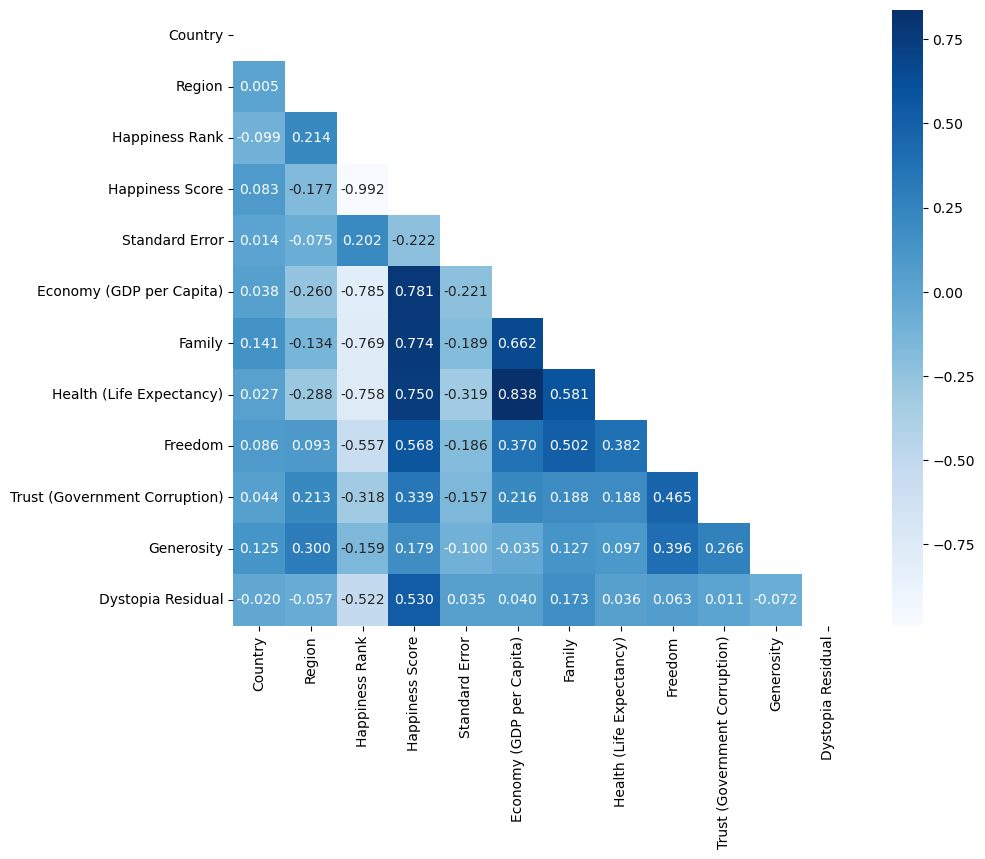

In [43]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Blues', mask=mask)
plt.show()

Observations from correlation heatmap:
- There is a very high negative correlation between Happiness Score and Happiness Rank.
- There is also a high positive correlation between Happiness Score and Economy (GDP per Capita), Happiness Score and Family, Happiness Score and Health (Life expectancy).
- There is a moderate positive correlation between Happiness Score and Freedom, and Happiness Score and Dystopia Residual.
- There is also a high positive correlation between Economy (GDP per Capita) and Health (Life Expectancy), and a moderate positive correlation between Economy (GDP per Capita) and Family.

In [44]:
df.corr()['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.773908
Health (Life Expectancy)         0.749896
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.338561
Generosity                       0.178763
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.222188
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

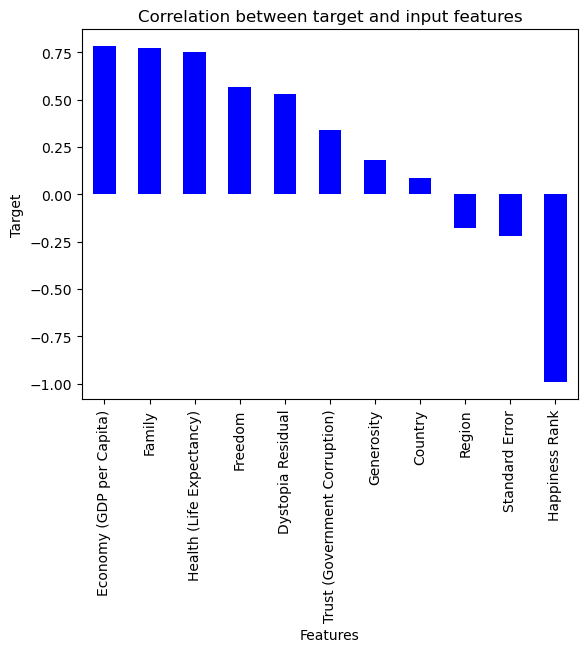

In [45]:
# Visualising the correlation between target and input features
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar', color='b')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

In [46]:
df.drop(['Happiness Rank', 'Country'], axis=1, inplace=True)

In [47]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,7.587,0.021419,1.39651,5.691972,2.179346,0.66557,0.153413,0.198464,2.51738
1,9.0,7.561,0.025790,1.30232,6.186694,2.204887,0.62877,0.093425,0.250490,2.70201
2,9.0,7.527,0.021113,1.32548,5.793505,1.923489,0.64938,0.158877,0.216981,2.49204
3,9.0,7.522,0.023018,1.45900,5.524497,1.962746,0.66973,0.147242,0.219169,2.46531
4,5.0,7.427,0.021926,1.32629,5.450357,2.039891,0.63297,0.142283,0.257230,2.45176


Happiness Rank is decided based on Happiness Score, so it is not relevant for the prediction model.<br>
Country also has no relationship with the Happiness Score and is not relevant for predicting Happiness Score.

### Separating features and target

In [48]:
x = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']

#### Feature Scaling

In [49]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,-0.972226,1.369621,1.669206,1.491765,1.577438,1.773991,0.622391,0.758258
1,1.300256,0.309350,1.135226,2.012132,1.532348,1.332456,0.315993,1.480995,1.092857
2,1.300256,-1.062017,1.192861,1.739586,1.085223,1.469659,1.906792,0.927973,0.712335
3,1.300256,-0.503610,1.525130,1.553118,1.147600,1.605131,1.624007,0.964080,0.663893
4,-0.040302,-0.823548,1.194876,1.501726,1.270179,1.360416,1.503484,1.592224,0.639337


### Checking Variance Inflation Factor (VIF)

In [50]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Region,1.333063
1,Standard Error,1.170531
2,Economy (GDP per Capita),4.493977
3,Family,2.184316
4,Health (Life Expectancy),4.041389
5,Freedom,1.860991
6,Trust (Government Corruption),1.374838
7,Generosity,1.428325
8,Dystopia Residual,1.060193


As we can see, there is no multicollinearity in the data. All VIF values are within acceptable range.

### Model Building

#### Splitting data into train and test

In [51]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(0, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.9977323877149309
Random state for best accuracy: 128


In [53]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=max_rs)

#### Regression models

In [54]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [55]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('XGBoost', xgboost.XGBRegressor())
]

results = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((model_name, mae, rmse, r2))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
df_results.sort_values('R2', ascending=False, inplace=True)

df_results

,Model,MAE,RMSE,R2
0,Linear Regression,0.052946,0.073085,0.996234
8,Ridge,0.052827,0.074429,0.996094
1,Support Vector Regressor,0.171087,0.281575,0.944100
6,Gradient Boosting,0.230305,0.286145,0.942270
9,XGBoost,0.215956,0.288896,0.941155
5,Extra Trees,0.228251,0.318233,0.928597
4,Random Forest,0.275265,0.356545,0.910370
2,KNN,0.302675,0.400735,0.886776
3,Decision Tree,0.385875,0.481752,0.836366
7,Lasso,1.005267,1.192122,-0.001996


Based on the R2 scores, Linear Regression seems to perform the best.

#### Cross validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
results = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2') # Using fold value of 5
    mean_score = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    diff = abs(r2 - mean_score)
    
    results.append((model_name, mae, rmse, r2, mean_score, diff))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2', 'CV R2', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,MAE,RMSE,R2,CV R2,Difference
8,Ridge,0.052827,0.074429,0.996094,0.990643,0.005452
0,Linear Regression,0.052946,0.073085,0.996234,0.990527,0.005706
2,KNN,0.302675,0.400735,0.886776,0.880104,0.006672
1,Support Vector Regressor,0.171087,0.281575,0.944100,0.905003,0.039097
4,Random Forest,0.273943,0.361053,0.908089,0.867132,0.040958
5,Extra Trees,0.231747,0.325312,0.925385,0.884001,0.041384
6,Gradient Boosting,0.231642,0.287391,0.941767,0.890587,0.051180
9,XGBoost,0.215956,0.288896,0.941155,0.846648,0.094507
7,Lasso,1.005267,1.192122,-0.001996,-0.098449,0.096453
3,Decision Tree,0.380333,0.472963,0.842283,0.664654,0.177629


The Ridge model has the least difference between validation and test scores. So it is the least overfitting model.

#### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {
    'alpha': [0, 0.5, 1, 1.5, 2, 5],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive': [True, False],
    'random_state': [1, 5, 10, 20, 50]
}

In [60]:
gcv = GridSearchCV(Ridge(), params, cv=5, scoring='r2')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.5, 1, 1.5, 2, 5],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': [1, 5, 10, 20, 50],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']},
             scoring='r2')

In [61]:
best_params = gcv.best_params_
best_params

{'alpha': 1,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'saga'}

In [62]:
model = Ridge(**best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 0.05282107369053545
Root Mean Squared Error: 0.07442308419618357
R2 Score: 0.9960948294867729


The final R2 score is 99.61%.

### Saving the model

In [63]:
import pickle

In [64]:
filename = 'final_happiness_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Predicting using the saved model

In [65]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [66]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

,Actual,Predicted
0,5.975,5.946762
1,6.130,6.057091
2,2.905,3.082962
3,4.419,4.341201
4,4.218,4.235080
5,3.931,3.942871
6,5.878,5.944200
7,5.890,5.821297
8,5.770,5.744820
9,7.378,7.328094


#### Actual vs Predicted

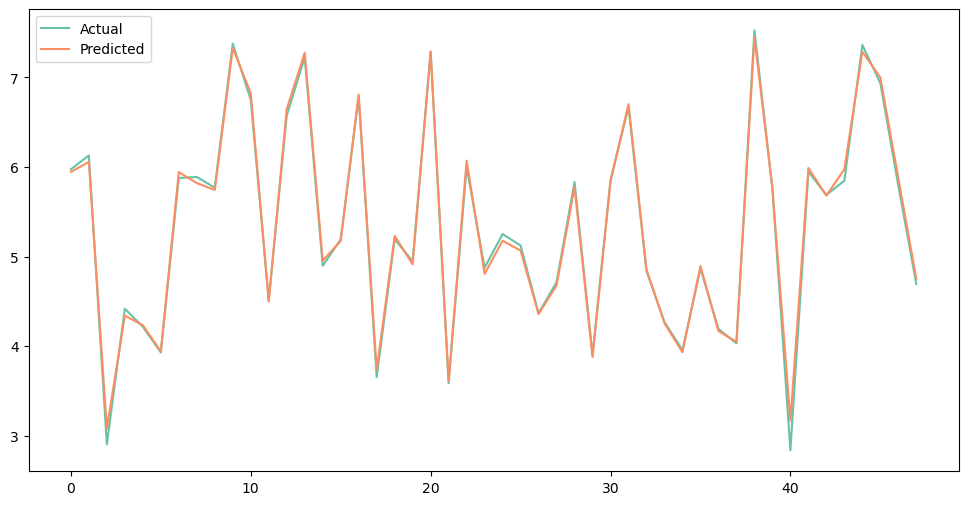

In [67]:
fig= plt.figure(figsize=(12,6))
test_df = test_df.reset_index()
test_df = test_df.drop(['index'],axis=1)
plt.plot(test_df)
plt.legend(['Actual','Predicted'])
plt.show()

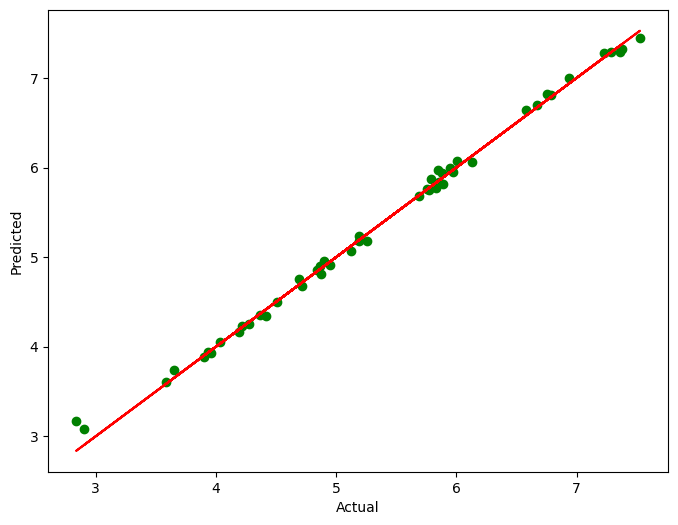

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=pred, color='g')
plt.plot(y_test, y_test, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These are the final predictions.